In [1]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
#torch.load('test.pt')

from torchvision import datasets
from torchvision import transforms 
from torchvision.transforms import ToTensor
transform = transforms.Compose([transforms.RandomRotation(100),
                       transforms.ToTensor()])
train_data = datasets.MNIST(
    root = 'data', train = True, transform = ToTensor(), download = True,            
)
test_data = datasets.MNIST(
    root = 'data', train = False, transform = ToTensor())

cuda


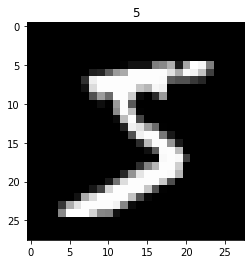

In [2]:
import matplotlib.pyplot as plt
plt.imshow(train_data.data[0], cmap='gray')
plt.title('%i' % train_data.targets[0])
plt.show()

loaders = {
    'train' : torch.utils.data.DataLoader(train_data, 
                                          batch_size=128, 
                                          shuffle=True, 
                                          num_workers=1),
    
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=128, 
                                          shuffle=True, 
                                          num_workers=1),
}

In [3]:
from vit_pytorch import ViT
N = 28

v = ViT(
    image_size = N,
    patch_size = 7,
    num_classes = 10,
    dim = 128,
    depth = 2,
    heads = 4,
    mlp_dim = 256,
    dropout = 0.1,
    emb_dropout = 0.1,
    channels = 1
)

In [4]:
v

ViT(
  (to_patch_embedding): Sequential(
    (0): Rearrange('b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1=7, p2=7)
    (1): LayerNorm((49,), eps=1e-05, elementwise_affine=True)
    (2): Linear(in_features=49, out_features=128, bias=True)
    (3): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (transformer): Transformer(
    (layers): ModuleList(
      (0-1): 2 x ModuleList(
        (0): PreNorm(
          (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
          (fn): Attention(
            (attend): Softmax(dim=-1)
            (dropout): Dropout(p=0.1, inplace=False)
            (to_qkv): Linear(in_features=128, out_features=768, bias=False)
            (to_out): Sequential(
              (0): Linear(in_features=256, out_features=128, bias=True)
              (1): Dropout(p=0.1, inplace=False)
            )
          )
        )
        (1): PreNorm(
          (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=T

In [5]:

v.load_state_dict(torch.load('test.pt'))

<All keys matched successfully>

In [7]:
loss_func = torch.nn.CrossEntropyLoss() 

from torch import optim
optimizer = optim.Adam(v.parameters(), lr = 0.01) 

num_epochs = 10
def train(num_epochs, cnn, loaders):
    
    #cnn.train()
        
    total_step = len(loaders['train'])
        
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):
            
           # b_x = Variable(images)   # batch x
           # b_y = Variable(labels)   # batch y
            output = v(images)               
            loss = loss_func(output, labels)
              
            optimizer.zero_grad()           
            
            loss.backward()    
            
            optimizer.step()                
            
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
            pass
        
        pass
    
    
    pass
train(num_epochs, v, loaders)

Epoch [1/10], Step [100/469], Loss: 0.4809
Epoch [1/10], Step [200/469], Loss: 0.5481
Epoch [1/10], Step [300/469], Loss: 0.4373
Epoch [1/10], Step [400/469], Loss: 0.4935
Epoch [2/10], Step [100/469], Loss: 0.5038
Epoch [2/10], Step [200/469], Loss: 0.6137
Epoch [2/10], Step [300/469], Loss: 0.5251
Epoch [2/10], Step [400/469], Loss: 0.4819
Epoch [3/10], Step [100/469], Loss: 0.4445
Epoch [3/10], Step [200/469], Loss: 0.3659
Epoch [3/10], Step [300/469], Loss: 0.3662
Epoch [3/10], Step [400/469], Loss: 0.3542
Epoch [4/10], Step [100/469], Loss: 0.6861
Epoch [4/10], Step [200/469], Loss: 0.4797
Epoch [4/10], Step [300/469], Loss: 0.5087
Epoch [4/10], Step [400/469], Loss: 0.4958
Epoch [5/10], Step [100/469], Loss: 0.4041
Epoch [5/10], Step [200/469], Loss: 0.5435
Epoch [5/10], Step [300/469], Loss: 0.7831
Epoch [5/10], Step [400/469], Loss: 0.8272
Epoch [6/10], Step [100/469], Loss: 0.6446
Epoch [6/10], Step [200/469], Loss: 0.6153
Epoch [6/10], Step [300/469], Loss: 0.5074
Epoch [6/10

In [6]:
torch.save(v.state_dict(),'test.pt')

import netron
netron.start('test.pt')

Serving 'test.pt' at http://localhost:8080


('localhost', 8080)

In [9]:

def test(num_epochs, cnn, loaders):
    
    #cnn.train()
        
    total_step = len(loaders['test'])
        
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['test']):
            
           # b_x = Variable(images)   # batch x
           # b_y = Variable(labels)   # batch y
            output = v(images) 
            o = output.argmax(1)
            p = o == labels
            
            print(p.sum()/128)  
           
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
            pass
        
        pass
    
    
    pass
test(1, v, loaders)

tensor(0.8125)
tensor(0.8750)
tensor(0.8672)
tensor(0.8438)
tensor(0.8438)
tensor(0.8750)
tensor(0.8438)
tensor(0.8594)
tensor(0.8438)
tensor(0.8438)
tensor(0.8906)
tensor(0.8281)
tensor(0.8750)
tensor(0.8438)
tensor(0.8516)
tensor(0.8984)
tensor(0.8750)
tensor(0.8828)
tensor(0.8750)
tensor(0.8203)
tensor(0.8828)
tensor(0.8359)
tensor(0.8906)
tensor(0.8516)
tensor(0.8984)
tensor(0.8906)
tensor(0.8672)
tensor(0.8281)
tensor(0.8359)
tensor(0.8125)
tensor(0.8750)
tensor(0.8906)
tensor(0.8438)
tensor(0.8828)
tensor(0.8672)
tensor(0.8359)
tensor(0.8047)
tensor(0.8750)
tensor(0.8828)
tensor(0.8047)
tensor(0.9062)
tensor(0.8203)
tensor(0.8281)
tensor(0.8359)
tensor(0.8281)
tensor(0.8438)
tensor(0.8516)
tensor(0.8047)
tensor(0.8594)
tensor(0.8281)
tensor(0.8203)
tensor(0.8672)
tensor(0.8516)
tensor(0.8438)
tensor(0.8672)
tensor(0.9219)
tensor(0.8047)
tensor(0.8906)
tensor(0.8203)
tensor(0.8047)
tensor(0.8359)
tensor(0.8984)
tensor(0.8906)
tensor(0.8359)
tensor(0.8906)
tensor(0.8828)
tensor(0.8

In [10]:
t = test_data[0][0]
t.shape




torch.Size([1, 28, 28])

In [11]:
t = t.unsqueeze(0)
V = v
from vit_pytorch.recorder import Recorder
V = Recorder(V)
#print(t.shape)

# img = torch.randn(1, 3, 256, 256)
preds, attns = V(t)

In [15]:
print(attns.shape)
attns = attns.cpu()
at = attns.numpy()
at = at[:,1,2,:,:]
at = at.squeeze(0)

torch.Size([1, 2, 4, 17, 17])


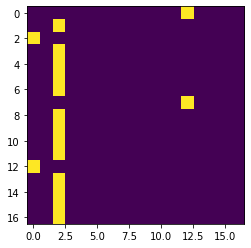

In [16]:
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
im = ax.imshow(at)

In [14]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter('test_1')
writer.add_graph(v, dummy_input)
writer.close()

ImportError: TensorBoard logging requires TensorBoard version 1.15 or above